In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/home/dsc/tfm_data/dogs-vs-cats/train'

In [3]:
!pwd

/home/dsc/TFM_food_recognition


Creamos el directorio donde vamos a guardar un sample de los datos:

In [5]:
base_dir = '/home/dsc/tfm_data/cats_and_dogs_small'
os.mkdir(base_dir)


Creamos los directorios de training, validation y test:

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Directorio de training de las fotos de gatitos:

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

Directorio de training de las fotos de perros:

In [8]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

Directorio de validación de las fotos de gatitos:

In [9]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

Directorio de validación de las fotos de los perros:

In [10]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

Y ahora vamos con el directorio de test de los gatos y los perros:

In [11]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [12]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Vamos a copiar las mil primeras imágenes al directorio de train de gatitos, las siguietnes 500 al de validation y las restantes 500, al de test:

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

Realizamos la misma operación con los directorios de perros:

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Realicemos una pequeña convnet:

In [18]:
from keras import layers
from keras import models

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Configuramos el modelo para el training;

In [23]:
from keras import optimizers

In [24]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Using <code>ImageDataGenerator</code> para leer las imágeenes de los directorios:

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255) # reescalar las imagenes por 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator =train_datagen.flow_from_directory(
        train_dir, # directorio objetivo
        target_size=(150,150), # rescalamos las imagenes a 150 x 150
        batch_size=20,
        class_mode='binary' # hemos usado binary_crossentropy, por lo que necesitamos etiquetas binary
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Ajustando el modelo con un batch generator:

In [30]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator, 
    validation_steps=50)

/home/dsc/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 49s 480ms/step - loss: 0.6959 - acc: 0.5285 - val_loss: 0.6806 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 50s 496ms/step - loss: 0.6721 - acc: 0.5778 - val_loss: 0.6840 - val_acc: 0.5780
Epoch 3/30
100/100 [==============================] - 54s 543ms/step - loss: 0.6252 - acc: 0.6431 - val_loss: 0.6162 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 54s 544ms/step - loss: 0.5832 - acc: 0.6952 - val_loss: 0.5972 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 55s 545ms/step - loss: 0.5277 - acc: 0.7290 - val_loss: 0.5838 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 54s 538ms/step - loss: 0.5100 - acc: 0.7486 - val_loss: 0.5892 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 53s 534ms/step - loss: 0.4695 - acc: 0.7697 - val_loss: 0.6035 - val_acc: 0.6780
Epoch 8/30
100/100 [==============================] - 5

Se considera una buena práctica guardar nuestro modelo:

In [35]:
%cd ../tfm_data/

/home/dsc/tfm_data


In [36]:
!pwd

/home/dsc/tfm_data


In [37]:
model.save('cats_and_dogs_small_1.h5')

In [38]:
%cd ../TFM_food_recognition/

/home/dsc/TFM_food_recognition


Vamos a pintar las curvas de loss y accuracy:

In [39]:
import matplotlib.pyplot as plt

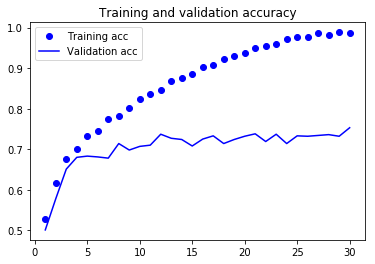

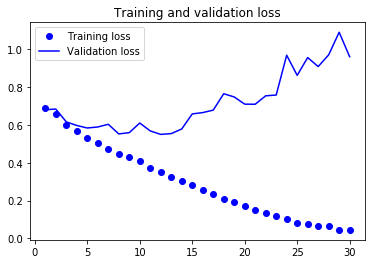

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()